# Text Mining and Analysis

In [29]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# libraries for dataset preparation, feature engineering, model training
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas as pd
import numpy as np

In [6]:
# libraries for dataset preparation, feature engineering, model training
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition
# from TextProcessor import *

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

# Configuring visualizations
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

-------------------------


In [7]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

np.random.seed(2019)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pablo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
df_news = pd.read_csv("training_news.csv", encoding="latin1")
df_news.head()

,category,headline,first_paragraph
0,polit,Trump's Crackdown On Immigrant Parents Puts Mo...,Last month a Health and Human Services officia...
1,polit,Trump's Son Should Be Concerned': FBI Obtained...,The wiretaps feature conversations between Ale...
2,polit,Edward Snowden: There's No One Trump Loves Mor...,"But don't count on Robert Mueller to nail him,..."
3,polit,Booyah: Obama Photographer Hilariously Trolls ...,Just a peeping minute.
4,polit,Ireland Votes To Repeal Abortion Amendment In ...,Irish women will no longer have to travel to t...


In [20]:
df_news.category.value_counts()

polit       484
health      433
economi     389
crime       385
other       318
educ        313
unemploy    194
corrupt     130
hunger       23
Name: category, dtype: int64

In [21]:
# English version
stoplist = gensim.parsing.preprocessing.STOPWORDS

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in stoplist and len(token) > 3:
            result.append(token) 
    result = " ".join(result)
    return result

In [24]:
df_news['clean_text'] = df_news['headline'].map(preprocess)

df_news.sample(5)

,category,headline,first_paragraph,clean_text
1132,health,Government accepts 'debilitating' effects of m...,Patients have suffered âdebilitating consequ...,government accepts debilitating effects medica...
96,polit,Pennsylvania's Congressional Delegation Will N...,It looks like at least one woman will be headi...,pennsylvania congressional delegation longer
2496,economi,For this year the Government has allocated $ 5...,NaN,year government allocated million public bank ...
343,educ,Texas District Says Students Protesting Gun Vi...,"""A disruption of the school will not be tolera...",texas district says students protesting violen...
644,unemploy,Cabrera questions 5.8% unemployment data,"VinÂ­cent CabrÂ­era, presÂ­iÂ­dent, Bankers In...",cabrera questions unemployment data


In [25]:
# Important Features

# n-gram level tf-idf 
tfidf = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1), stop_words=stoplist, min_df=0.00, max_features=5000)
tfidf.fit( df_news["clean_text"] )
x_tfidf = tfidf.transform( df_news["clean_text"] )

# Term-Frequency matrix
features = pd.DataFrame()
features["tokens"] = tfidf.get_feature_names()
features["counts"] = x_tfidf.sum(axis=0).T

features.sort_values("counts", ascending=False)[:10]

,tokens,counts
673,brazil,203
4703,venezuela,198
2753,news,177
1080,colombia,142
4912,world,130
298,argentina,129
944,chile,122
4607,unemployment,119
2972,president,98
2891,peru,92


Parece que debemos quitar mas stopwords...

In [ ]:
from nltk.corpus import stopwords

# Bring in the default English NLTK stop words
stoplist = stopwords.words('english')

# Define additional stopwords in a string
additional_stopwords = """
brazil
... resto ...
"""

# Split the the additional stopwords string on each word and then add those words to the NLTK stopwords list
stoplist += additional_stopwords.split()
stoplist = set( stoplist ).union(gensim.parsing.preprocessing.STOPWORDS)

In [24]:
df_news['clean_text'] = df_news['headline'].map(preprocess)

df_news.sample(5)

,category,headline,first_paragraph,clean_text
1132,health,Government accepts 'debilitating' effects of m...,Patients have suffered âdebilitating consequ...,government accepts debilitating effects medica...
96,polit,Pennsylvania's Congressional Delegation Will N...,It looks like at least one woman will be headi...,pennsylvania congressional delegation longer
2496,economi,For this year the Government has allocated $ 5...,NaN,year government allocated million public bank ...
343,educ,Texas District Says Students Protesting Gun Vi...,"""A disruption of the school will not be tolera...",texas district says students protesting violen...
644,unemploy,Cabrera questions 5.8% unemployment data,"VinÂ­cent CabrÂ­era, presÂ­iÂ­dent, Bankers In...",cabrera questions unemployment data


In [40]:
# Important Features

# n-gram level tf-idf 
tfidf = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1), stop_words=stoplist, min_df=0.00, max_features=5000)
tfidf.fit( df_news["clean_text"] )
x_tfidf = tfidf.transform( df_news["clean_text"] )

# Term-Frequency matrix
features = pd.DataFrame()
features["tokens"] = tfidf.get_feature_names()
features["counts"] = x_tfidf.sum(axis=0).T

features.sort_values("counts", ascending=False)[:10]

,tokens,counts
673,brazil,203
4703,venezuela,198
2753,news,177
1080,colombia,142
4912,world,130
298,argentina,129
944,chile,122
4607,unemployment,119
2972,president,98
2891,peru,92


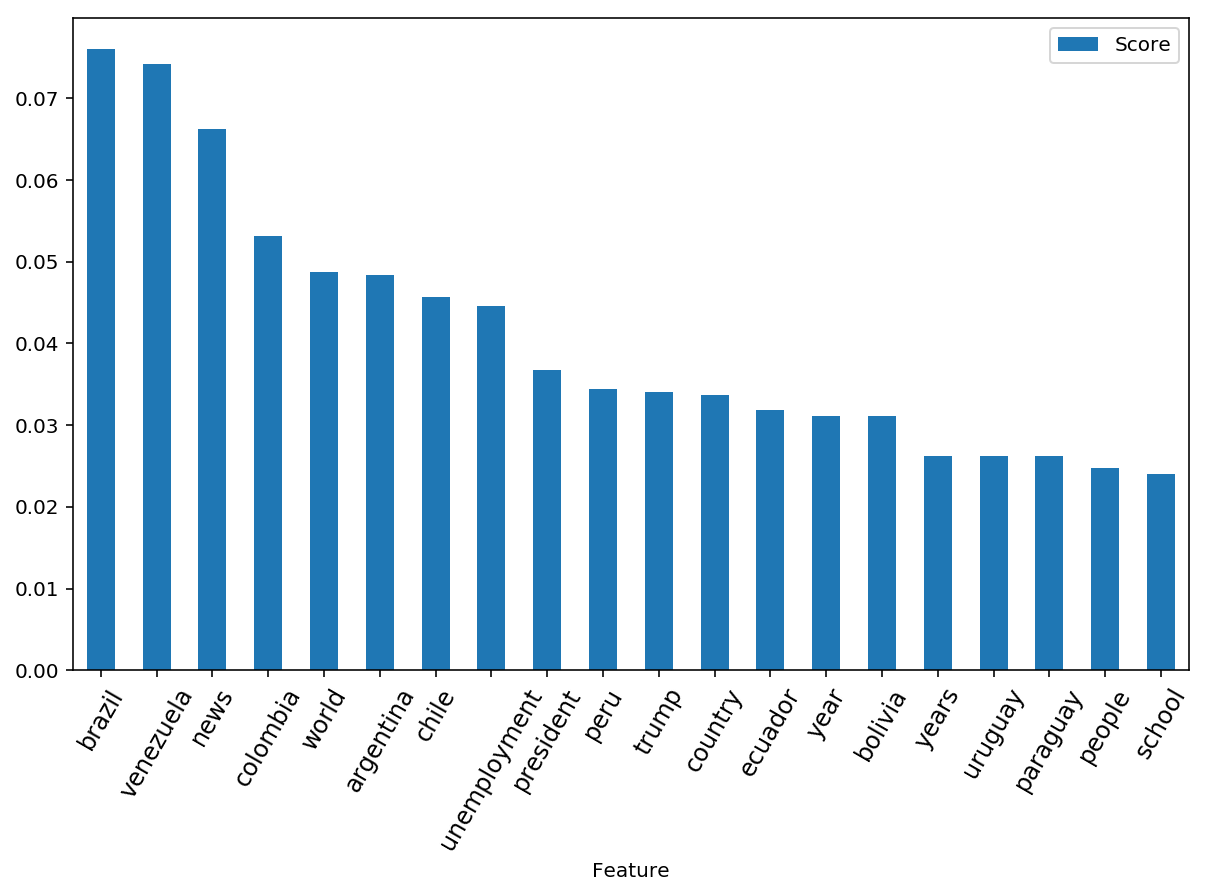

In [41]:
# Creo el dataset features
features = pd.DataFrame()
features["Feature"] = tfidf.get_feature_names()
features["Score"] = x_tfidf.mean(axis=0).T
features.sort_values("Score", ascending=False)[:20].plot(kind="bar", x="Feature", figsize=(10,6))
plt.xticks(fontsize=12, rotation=60)
plt.yticks(fontsize=10)
plt.show()

In [30]:
# split the dataset into training and validation datasets, using label proportions with "stratify"
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df_news['clean_text'], df_news['category'], stratify=df_news['category'], test_size=0.3)

In [35]:
# n-gram level tf-idf 
tfidf = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1,1), stop_words=stoplist, min_df=0.00, max_features=5000)
tfidf.fit( train_x )
train_x_tfidf = tfidf.transform( train_x )
valid_x_tfidf = tfidf.transform( valid_x )

train_x_tfidf.shape

(1868, 5000)

In [36]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [37]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), train_x_tfidf, train_y, valid_x_tfidf)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.6916354556803995


In [38]:
# Naive Bayes on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), train_x_tfidf, train_y, valid_x_tfidf)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.6379525593008739
